## High Frequencies in the concentration get smoothed out first  
### Ultimately, the only frequency passing thru is zero! (i.e., uniform concentration at equilibrium)
#### We explore how an initial concentration with 3 different sinusoidal frequencies fares in the course of a diffusion to equilibrium

**The initial system state will consist of:**  
    0 - A constant baseline of value 30  
    1 - A sine wave of frequency 1 (1 cycle across the system's length), of amplitude 10  
    2 - A sine wave of frequency 10 , of amplitude 4  
    3 - A sine wave of frequency 40 , of amplitude 2  

LAST REVISED: Nov. 28, 2022

In [1]:
# Extend the sys.path variable, to contain the project's root directory
import set_path
set_path.add_ancestor_dir_to_syspath(3)  # The number of levels to go up 
                                         # to reach the project's home from the folder containing this notebook

Added 'D:\Docs\- MY CODE\BioSimulations\life123-Win7' to sys.path


In [2]:
from experiments.get_notebook_info import get_notebook_basename

from src.life_1D.bio_sim_1d import BioSim1D

import plotly.express as px
import plotly.graph_objects as go

from src.modules.reactions.reaction_data import ReactionData as chem
from src.modules.html_log.html_log import HtmlLog as log
from src.modules.visualization.graphic_log import GraphicLog

In [3]:
# Initialize the HTML logging
log_file = get_notebook_basename() + ".log.htm"    # Use the notebook base filename for the log file
GraphicLog.config(filename=log_file,
                  components=["vue_heatmap_11", "vue_curves_3"])

-> Output will be LOGGED into the file 'low_pass_1.log.htm'


In [4]:
# Set the heatmap parameters
heatmap_pars = {"range": [10, 50],
                "outer_width": 850, "outer_height": 150,
                "margins": {"top": 30, "right": 30, "bottom": 30, "left": 55}
                }

# Set the parameters of the line plots
lineplot_pars = {"range": [10, 50],
                "outer_width": 850, "outer_height": 250,
                "margins": {"top": 30, "right": 30, "bottom": 30, "left": 55}
                }

In [5]:
# Initialize the system.  We use a RELATIVELY LARGE NUMBER OF BINS, 
# to captures the many changes in the high-frequency component
chem_data = chem(names=["A"], diffusion_rates=[0.5])
bio = BioSim1D(n_bins=500, chem_data=chem_data)

## PART 1 (of 3) of Initial Preparation -
### Start with a sinusoidal concentration, with exactly 1 cycle over the length of the system
#### (notice the bias value of 30; it will be seen at the eventual equilibrium, at the end)

In [6]:
bio.inject_sine_conc(species_name="A", amplitude=10, bias=30, frequency=1)

In [7]:
bio.show_system_snapshot()

SYSTEM SNAPSHOT at time 0:
             A
0    30.000000
1    30.125660
2    30.251301
3    30.376902
4    30.502443
..         ...
495  29.372095
496  29.497557
497  29.623098
498  29.748699
499  29.874340

[500 rows x 1 columns]


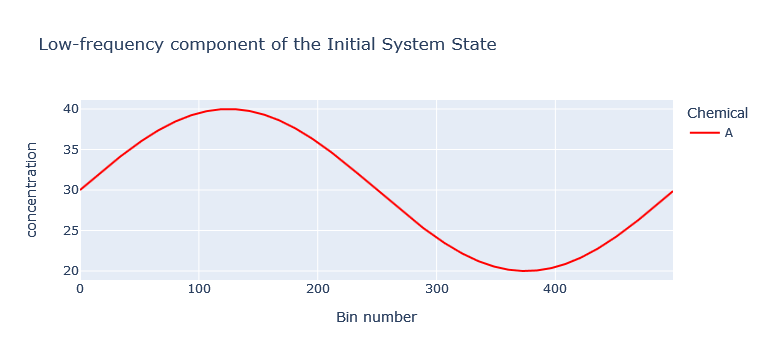

In [8]:
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
              title= "Low-frequency component of the Initial System State",
              color_discrete_sequence = ['red'],
              labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

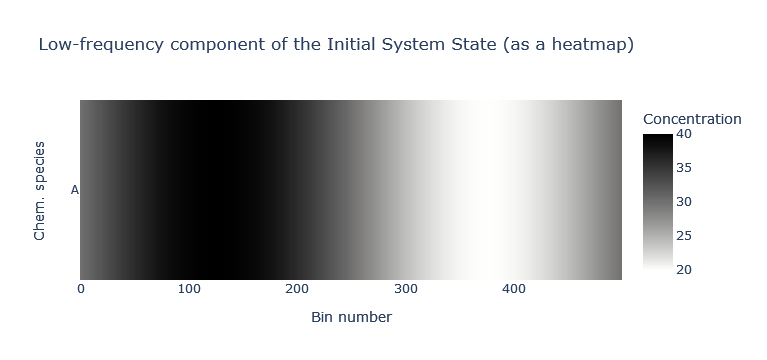

In [9]:
# Show as heatmap
fig = px.imshow(bio.system_snapshot().T, 
                title= "Low-frequency component of the Initial System State (as a heatmap)", 
                labels=dict(x="Bin number", y="Chem. species", color="Concentration"),
                text_auto=False, color_continuous_scale="gray_r") 

fig.data[0].xgap=0
fig.data[0].ygap=0

fig.show()

In [10]:
# Output to the log file
log.write("Diffusion as a Low-Pass Filter", style=log.h3)

log.write(f"Low-frequency component of the Initial System State:", blanks_before=2, style=log.bold)

# Output a heatmap to the log file
bio.single_species_heatmap(species_index=0, heatmap_pars=heatmap_pars, header=f"Time {bio.system_time} :\n", graphic_component="vue_heatmap_11")
# Output a line plot the log file
bio.single_species_line_plot(species_index=0, plot_pars=lineplot_pars, graphic_component="vue_curves_3")

Diffusion as a Low-Pass Filter


Low-frequency component of the Initial System State:
[GRAPHIC ELEMENT SENT TO LOG FILE `low_pass_1.log.htm`]
[GRAPHIC ELEMENT SENT TO LOG FILE `low_pass_1.log.htm`]


## PART 2 (of 3) of Initial Preparation -
### Now add a higher-frequency component (10 cycles over the length of the system)

In [11]:
bio.inject_sine_conc(species_name="A", amplitude=4, bias=0, frequency=10)

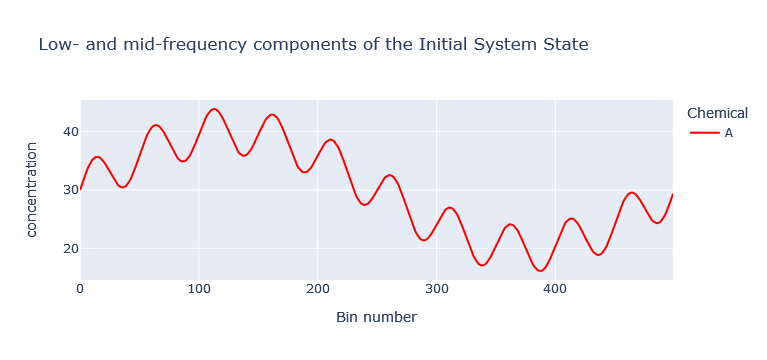

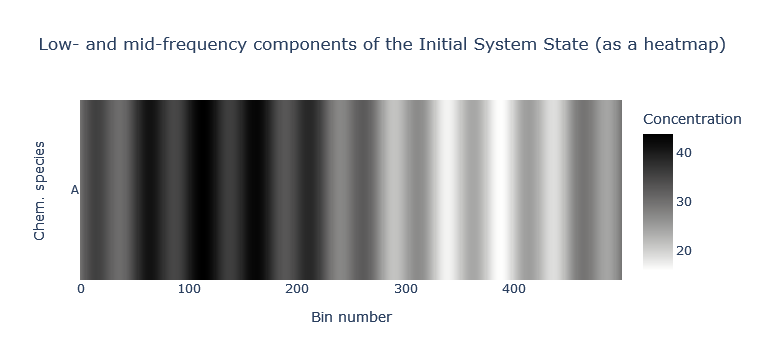

In [12]:
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
              title= "Low- and mid-frequency components of the Initial System State",
              color_discrete_sequence = ['red'],
              labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

# Show as heatmap
fig = px.imshow(bio.system_snapshot().T, 
                title= "Low- and mid-frequency components of the Initial System State (as a heatmap)", 
                labels=dict(x="Bin number", y="Chem. species", color="Concentration"),
                text_auto=False, color_continuous_scale="gray_r") 

fig.data[0].xgap=0
fig.data[0].ygap=0

fig.show()

## PART 3 (of 3) of Initial Preparation -
### To complete the preparation of a 3-frequency component initial state, add another, even higher, frequency component 
#### (40 cycles over the length of the system)

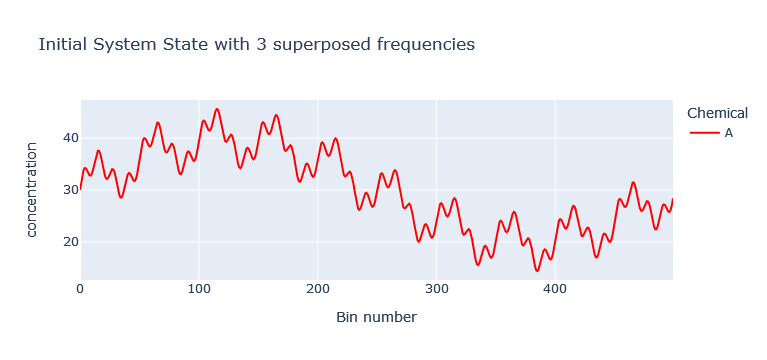

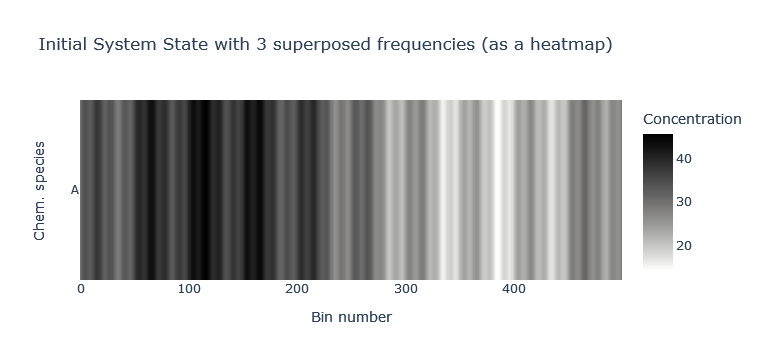

In [13]:
bio.inject_sine_conc(species_name="A", amplitude=2, bias=0, frequency=40)

fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
              title= "Initial System State with 3 superposed frequencies",
              color_discrete_sequence = ['red'],
              labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()


# Show as heatmap
fig = px.imshow(bio.system_snapshot().T, 
                title= "Initial System State with 3 superposed frequencies (as a heatmap)", 
                labels=dict(x="Bin number", y="Chem. species", color="Concentration"),
                text_auto=False, color_continuous_scale="gray_r") 

fig.data[0].xgap=0
fig.data[0].ygap=0

fig.show()

In [14]:
# Take a look at the frequency domain of the concentration values
bio.frequency_analysis(species_name="A")

Frequency  Relative Amplitude
0        0.0                 3.0
1        1.0                 1.0
2       10.0                 0.4
3       40.0                 0.2

# Start the diffusion steps

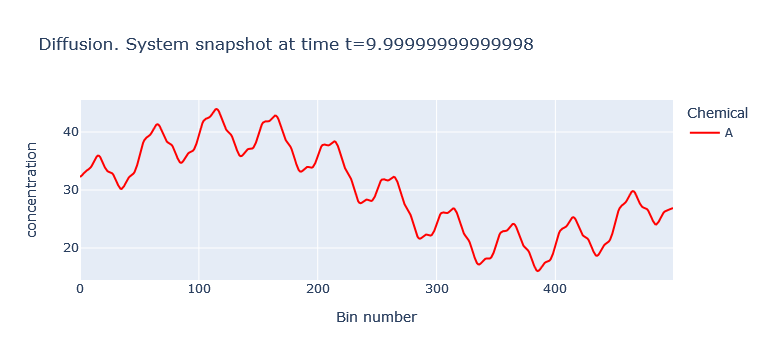

In [15]:
bio.diffuse(total_duration=10, time_step=0.1)

# Show as a line plot
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
          title= f"Diffusion. System snapshot at time t={bio.system_time}",
          color_discrete_sequence = ['red'],
          labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

### After the initial diffusion (at t=10), the highest frequency is largely gone

In [16]:
# Take a look at the frequency domain of the concentration values
bio.frequency_analysis(species_name="A")

Frequency  Relative Amplitude
0          0.0            3.002048
1          1.0            1.000000
2          2.0            0.000214
3          3.0            0.000321
4          4.0            0.000426
..         ...                 ...
246      246.0            0.001063
247      247.0            0.001063
248      248.0            0.001063
249      249.0            0.001062
250      250.0            0.001062

[251 rows x 2 columns]

In [17]:
# A lot of tiny frequency components are now present; take just the largest 4
bio.frequency_analysis(species_name="A", n_largest=4)

Frequency  Relative Amplitude
0         0.0            3.002048
1         1.0            1.000000
10       10.0            0.370945
40       40.0            0.060187

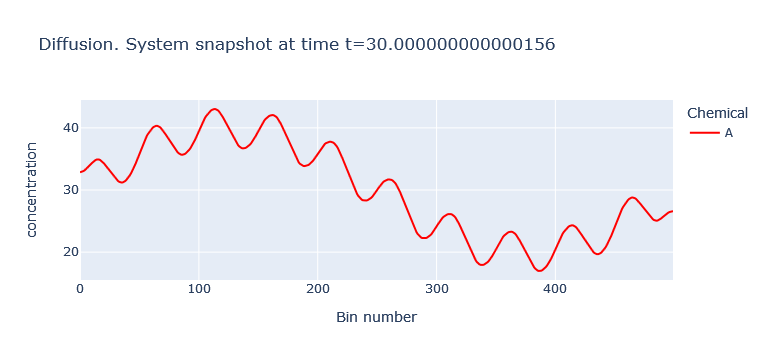

In [18]:
# Advance the diffusion
bio.diffuse(total_duration=20, time_step=0.1)

# Show as a line plot
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
          title= f"Diffusion. System snapshot at time t={bio.system_time}",
          color_discrete_sequence = ['red'],
          labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

### After additional diffusion (at t=30), the highest frequency (40 cycles) can no longer be visually detected.
#### The 2 lower frequency are still recognizable
#### The 40-cycle frequency is not even among the largest of the tiny values in the spurious frequencies of the distorted signal

In [19]:
bio.frequency_analysis(species_name="A", n_largest=10)

Frequency  Relative Amplitude
0         0.0            3.005903
1         1.0            1.000000
10       10.0            0.319950
40       40.0            0.009387
25       25.0            0.005578
24       24.0            0.005577
26       26.0            0.005565
23       23.0            0.005563
27       27.0            0.005541
22       22.0            0.005533

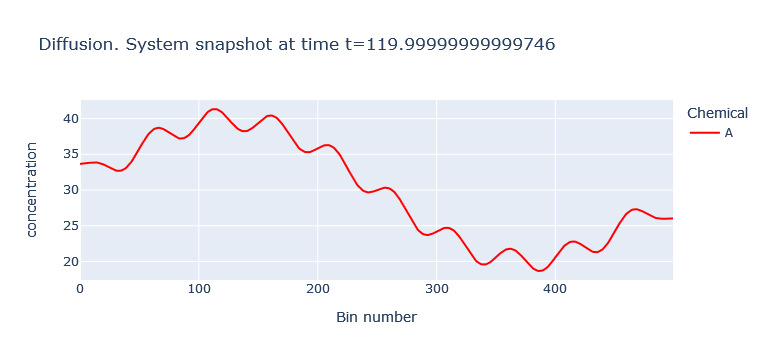

In [20]:
# Advance the diffusion
bio.diffuse(total_duration=90, time_step=0.1)

# Show as a line plot
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
          title= f"Diffusion. System snapshot at time t={bio.system_time}",
          color_discrete_sequence = ['red'],
          labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

### By now (at t=120), even the middle frequency (10 cycles) is notably attenuated

In [21]:
bio.frequency_analysis(species_name="A", n_largest=3)

Frequency  Relative Amplitude
0         0.0            3.022429
1         1.0            1.000000
10       10.0            0.169929

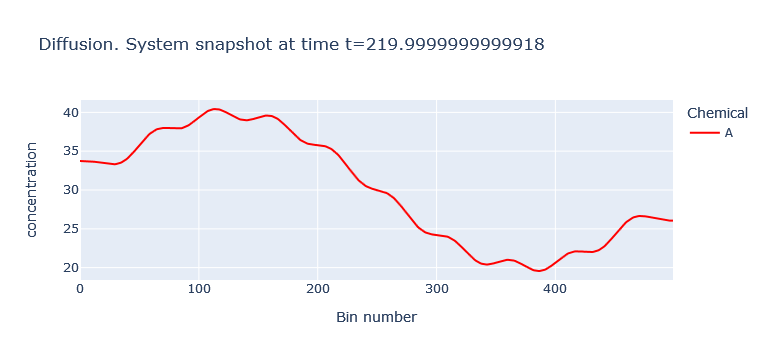

In [22]:
# Advance the diffusion
bio.diffuse(total_duration=100, time_step=0.1)

# Show as a line plot
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
          title= f"Diffusion. System snapshot at time t={bio.system_time}",
          color_discrete_sequence = ['red'],
          labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

### With still more diffusion (at t=220), the middle frequency is only weakly visible

In [23]:
bio.frequency_analysis(species_name="A", n_largest=3)

Frequency  Relative Amplitude
0         0.0            3.040431
1         1.0            1.000000
10       10.0            0.091228

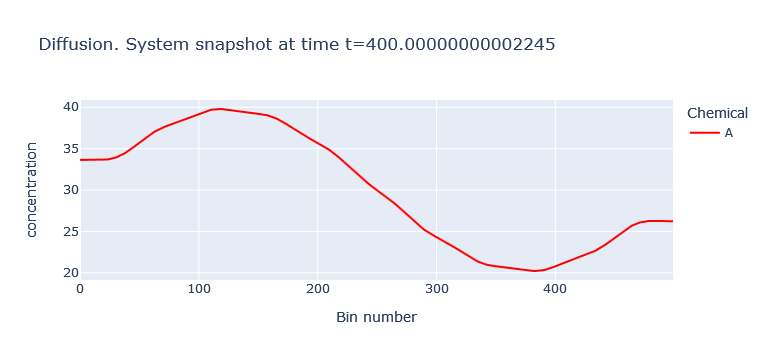

In [24]:
# Advance the diffusion
bio.diffuse(total_duration=180, time_step=0.1)

# Show as a line plot
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
          title= f"Diffusion. System snapshot at time t={bio.system_time}",
          color_discrete_sequence = ['red'],
          labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

### By t=400, the middle frequency is barely noticeable.  The low frequency (1 cycle) is still prominent

In [25]:
bio.frequency_analysis(species_name="A", n_largest=3)

Frequency  Relative Amplitude
0         0.0            3.073257
1         1.0            1.000000
10       10.0            0.040847

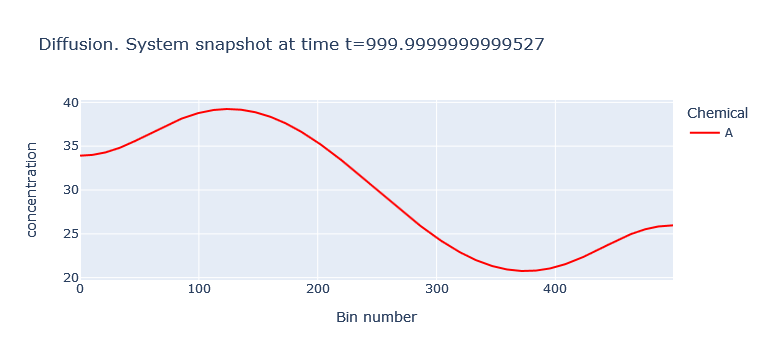

In [26]:
# Advance the diffusion
bio.diffuse(total_duration=600, time_step=0.3)

# Show as a line plot
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
          title= f"Diffusion. System snapshot at time t={bio.system_time}",
          color_discrete_sequence = ['red'],
          labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

### By t=1,000 there's no visual indication of the middle frequency (f=10)

In [27]:
bio.frequency_analysis(species_name="A", n_largest=10)

Frequency  Relative Amplitude
0        0.0            3.184159
1        1.0            1.000000
4        4.0            0.045772
5        5.0            0.044181
3        3.0            0.043093
6        6.0            0.040484
7        7.0            0.036275
2        2.0            0.034303
8        8.0            0.032375
9        9.0            0.029048

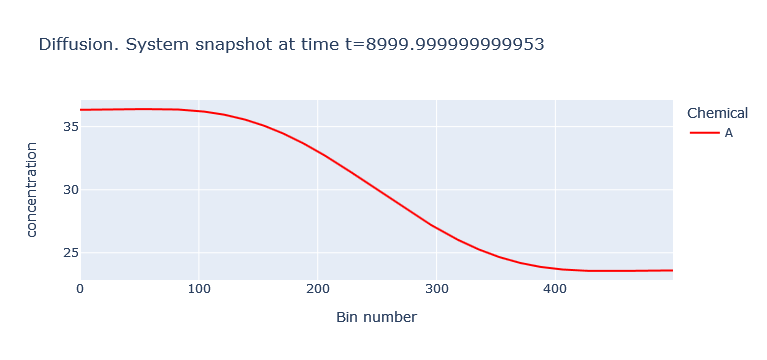

In [28]:
# Advance the diffusion
bio.diffuse(total_duration=8000, time_step=.5)

# Show as a line plot
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
          title= f"Diffusion. System snapshot at time t={bio.system_time}",
          color_discrete_sequence = ['red'],
          labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

### By t=9,000 even the lowest frequency has lost a major part of its sinusoidal shape

In [29]:
bio.frequency_analysis(species_name="A", n_largest=2)

Frequency  Relative Amplitude
0        0.0            4.456851
1        1.0            1.000000

Note how the zero-frequency is now gaining over the baseline 1-cycle signal

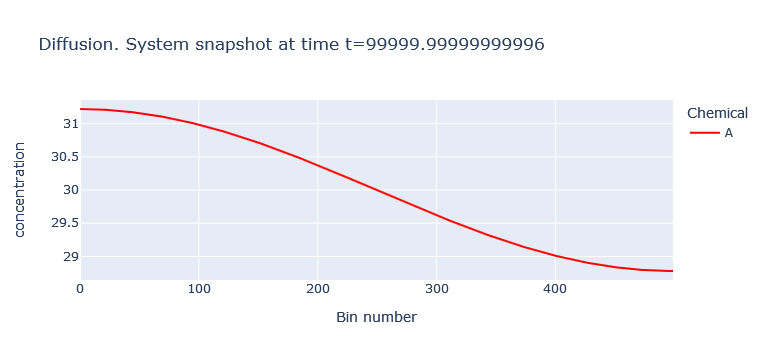

In [30]:
# Advance the diffusion
bio.diffuse(total_duration=91000, time_step=.5)

# Show as a line plot
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
          title= f"Diffusion. System snapshot at time t={bio.system_time}",
          color_discrete_sequence = ['red'],
          labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

In [31]:
bio.frequency_analysis(species_name="A", n_largest=2)

Frequency  Relative Amplitude
0        0.0           28.997098
1        1.0            1.000000

### By t=100,000 the system is clearly approaching equilibrium

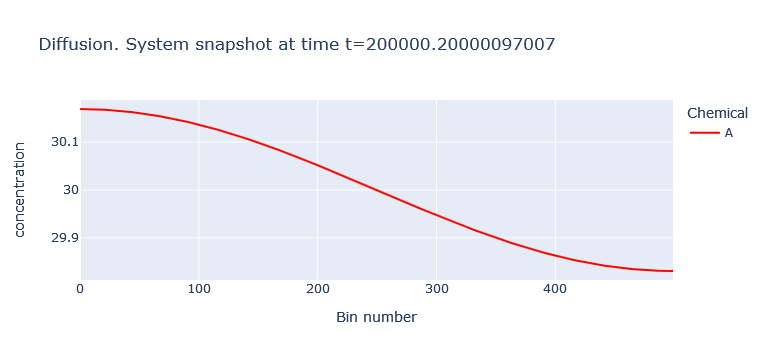

In [32]:
# Advance the diffusion
bio.diffuse(total_duration=100000, time_step=.6)

# Show as a line plot
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
          title= f"Diffusion. System snapshot at time t={bio.system_time}",
          color_discrete_sequence = ['red'],
          labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

### By t=200,000 the system is getting close to equilibrium about the value 30, which was the original "bias" (unvarying component) of the baseline frequency (the higher-frequency signals didn't have any bias)

In [33]:
bio.frequency_analysis(species_name="A", n_largest=2)

Frequency  Relative Amplitude
0        0.0          208.747593
1        1.0            1.000000